In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXNlclxEb2N1bWVudHNcR2l0SHViXHByaW1lbnVtYmVyc2FtLmdpdGh1Yi5pb1xhcHBlbmRpeA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp949.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\i

In [2]:
# 30 years of crsp_monthly
# start_date = "1994-01-31" # i.e. '1994-02-01'
# end_date = "2023-12-31"

# Because of 5 year rolling estimation of monthly beta
start_date = "1999-01-31"
end_date = "2023-12-31"

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 1999-01-31
End Date: 2023-12-31


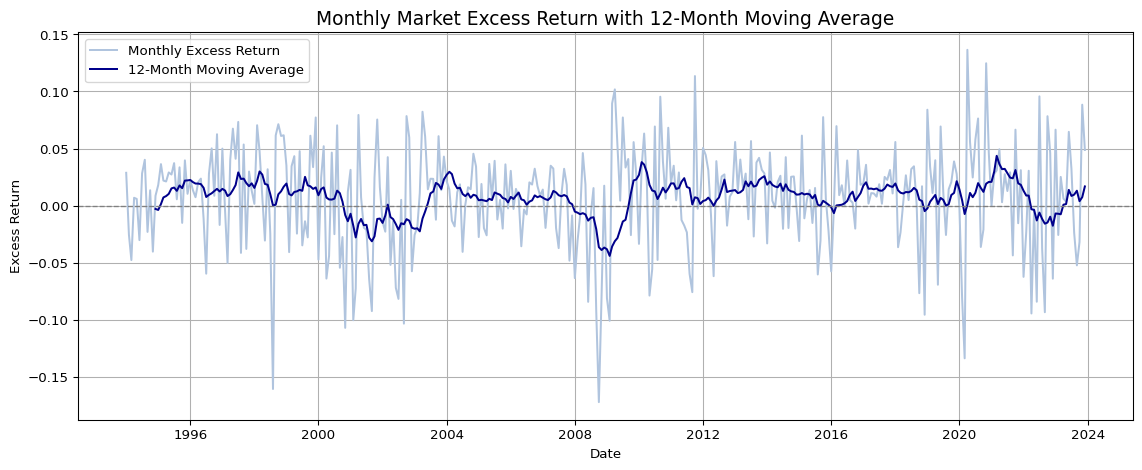

In [3]:
#@title Libraries and Time-window
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import sqlite3

tidy_finance = sqlite3.connect("../../colab/tidy_finance_python.sqlite")

factors_ff3_monthly = pd.read_sql_query(
  sql="SELECT month, mkt_excess, rf FROM factors_ff3_monthly",
  con=tidy_finance,
  parse_dates={"month"}
)

# 1994-01-01 indicates mktcap at 1994-01-31 which is the start date
# the first return is calculated
crsp_monthly = pd.read_sql_query(
  sql="SELECT permno, month, ret, ret_excess, mktcap, mktcap_lag, siccd, industry, exchange FROM crsp_monthly",
  con=tidy_finance,
  parse_dates={"month"}
)

# 5 year rolling estimated beta is available from 1999-01-01
beta = (pd.read_sql_query(
    sql="SELECT permno, month, beta_monthly FROM beta",
    con=tidy_finance,
    parse_dates={"month"})
)

beta_lag = (beta
  .assign(month = lambda x: x["month"] + pd.DateOffset(months=1))
  .get(["permno", "month", "beta_monthly"])
  .rename(columns={"beta_monthly": "beta_lag"})
  .dropna()
)

# Calculate 12-month moving average
factors_ff3_monthly['mkt_excess_ma12'] = factors_ff3_monthly['mkt_excess'].rolling(window=12).mean()

# Plot: Market Excess Return with 12-month Moving Average
plt.figure(figsize=(12, 5))
plt.plot(factors_ff3_monthly['month'], factors_ff3_monthly['mkt_excess'], label='Monthly Excess Return', color='lightsteelblue')
plt.plot(factors_ff3_monthly['month'], factors_ff3_monthly['mkt_excess_ma12'], label='12-Month Moving Average', color='darkblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Monthly Market Excess Return with 12-Month Moving Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

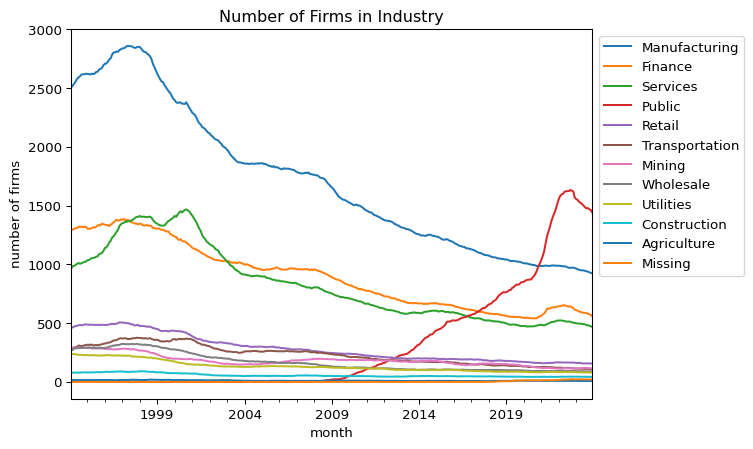

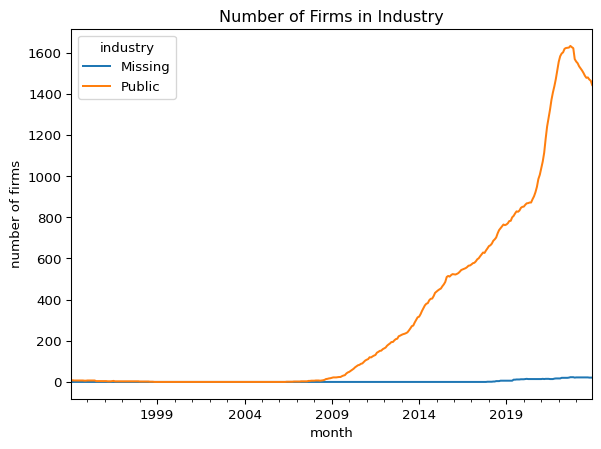

The average number of firms in Missing industry is 2.82


In [4]:
#@title Number of Firms in Industry Portfolios
# First, create a dummy column for counting
crsp_monthly['count'] = 1

# Create the pivot table
pfo_number = crsp_monthly.pivot_table(
    values='count',  # The column to aggregate (count in this case)
    index='month',    # The column to use as index
    columns='industry', # The column to use as columns
    aggfunc='sum',    # The aggregation function to use (sum in this case)
    fill_value=0      # Fill NaN values with 0
)

sorted_columns = pfo_number.mean().sort_values(ascending=False).index
pfo_number[sorted_columns].plot(
    kind='line',
    xlabel='month',
    ylabel='number of firms',
    title='Number of Firms in Industry'
)
plt.legend(bbox_to_anchor=(1.0, 1.0)) # legend outside
plt.show()

pfo_number[['Missing','Public']].plot(
    kind='line',
    xlabel='month',
    ylabel='number of firms',
    title='Number of Firms in Industry'
)
plt.show()

print('The average number of firms in Missing industry is', pfo_number['Missing'].mean().round(2))

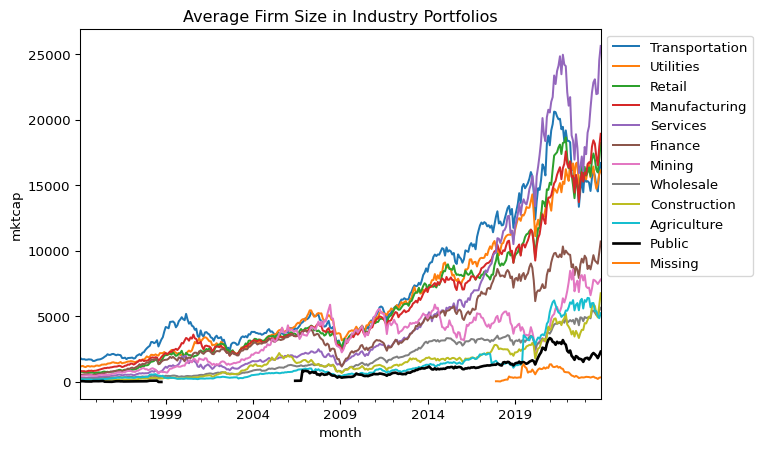

In [5]:
#@title Industry Concentration Dynamics

# Average Firm Size in Industry Portfolios (Public in Black)

pfo_size = crsp_monthly.pivot_table(
    index='month',
    columns='industry',
    values='mktcap',
    aggfunc='mean'
)

sorted_columns = pfo_size.mean().sort_values(ascending=False).index

ax = pfo_size[sorted_columns].plot(
    kind='line',
    xlabel='month',
    ylabel='mktcap',
    title='Average Firm Size in Industry Portfolios',
    linewidth=1.5
)

# Set Public line to black
for line, col in zip(ax.get_lines(), sorted_columns):
    if col == "Public":
        line.set_color('black')
        line.set_linewidth(2.0)

plt.legend(bbox_to_anchor=(1.0, 1.0))  # legend outside
plt.show()

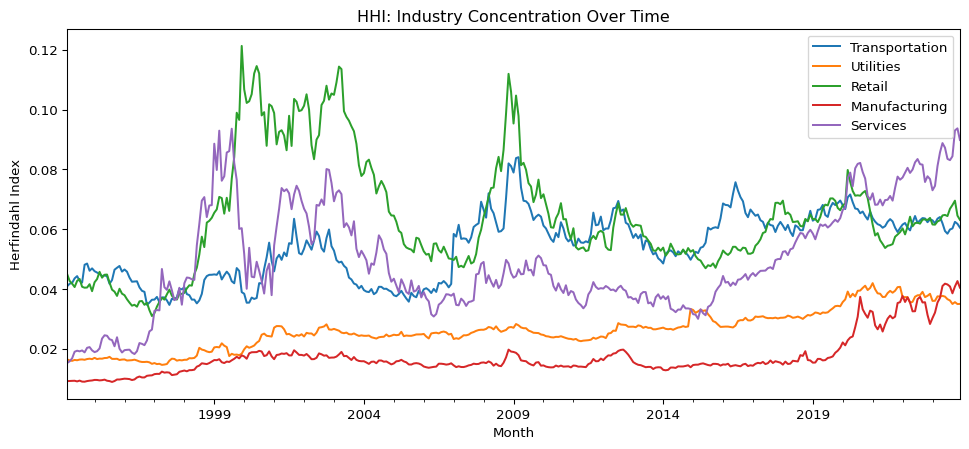

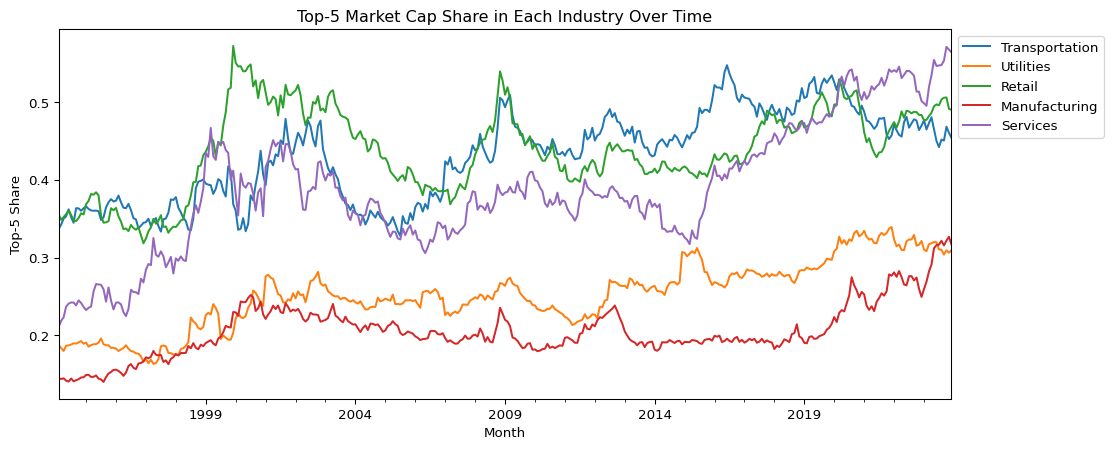

In [6]:
#@title 산업 내 HHI (Herfindahl-Hirschman Index)

# Step 1: 각 월, 각 산업 내 기업별 시가총액 비중 계산
crsp_monthly['mktcap_share'] = (
    crsp_monthly
    .groupby(['month', 'industry'], group_keys=False)['mktcap']
    .transform(lambda x: x / x.sum())
)

# Step 2: HHI 계산 (각 산업의 각 월에 대해)
industry_hhi = (
    crsp_monthly
    .assign(mktcap_share_sq=lambda x: x['mktcap_share'] ** 2)
    .groupby(['month', 'industry'], group_keys=False)['mktcap_share_sq']
    .sum()
    .unstack()
    .sort_index()
)

# 산업 내 Top-5 Market Cap Share 계산 
def top5_share_func(df):
    # group에는 'month', 'industry'가 포함되므로 사용하지 않음
    top5_sum = df.nlargest(5, 'mktcap')['mktcap'].sum()
    total = df['mktcap'].sum()
    return top5_sum / total if total != 0 else np.nan

# Step: 그룹핑 컬럼을 index로 빼서 apply의 group에서 제거
top5_share = (
    crsp_monthly
    .sort_values(['month', 'industry', 'mktcap'], ascending=[True, True, False])
    .set_index(['month', 'industry'])  # <-- group에 포함되지 않게 index로 설정
    .groupby(['month', 'industry'], group_keys=False)
    .apply(top5_share_func)  # group에 month/industry 포함되지 않음
    .unstack()  # 산업별 column
    .sort_index()
)

selected_industries = ['Transportation', 'Utilities', 'Retail', 'Manufacturing', 'Services']

# HHI plot
industry_hhi[selected_industries].plot(
    figsize=(12, 5),
    title='HHI: Industry Concentration Over Time',
    ylabel='Herfindahl Index',
    xlabel='Month'
)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Top-5 Share plot
top5_share[selected_industries].plot(
    figsize=(12, 5),
    title='Top-5 Market Cap Share in Each Industry Over Time',
    ylabel='Top-5 Share',
    xlabel='Month'
)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [7]:
#@title df: Drop industry 'Missing' and Re-classify industry 'Public' to 'Services'

# Copy original
df = crsp_monthly.copy()

# Drop Missing
df = df[df['industry'] != 'Missing']

# Reclassify Public → Services
df.loc[df['industry'] == 'Public', 'industry'] = 'Services'

# Merge with factor data and beta
df = (df
  .merge(beta, how="inner", on=["permno", "month"])
  .merge(beta_lag, how="inner", on=["permno", "month"])
  .merge(factors_ff3_monthly, how="inner", on=["month"])
)

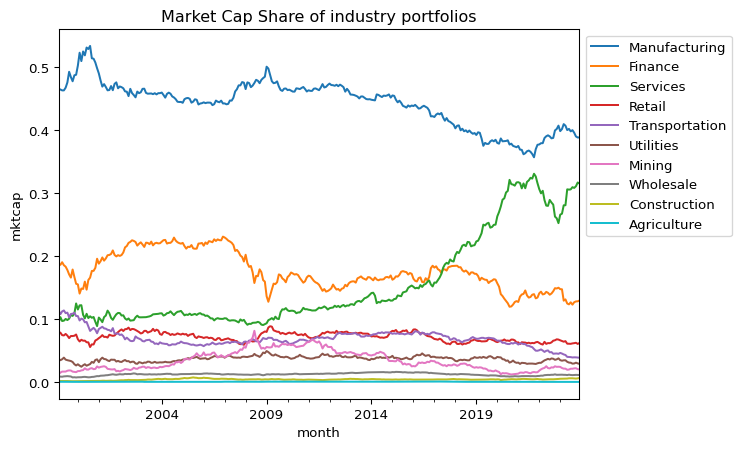

In [8]:
#@title Market Cap Share of industry portfolios
pfo_share = df.pivot_table(index='month', columns='industry', values='mktcap', aggfunc='sum')

# Normalize pfo_share to sum to 1 for each row
pfo_share[:] = pfo_share.div(pfo_share.sum(axis=1), axis=0)

sorted_columns = pfo_share.mean().sort_values(ascending=False).index
pfo_share[sorted_columns].plot(
    kind='line',
    xlabel='month',
    ylabel='mktcap',
    title='Market Cap Share of industry portfolios'
)
plt.legend(bbox_to_anchor=(1.0, 1.0)) # legend outside
plt.show()

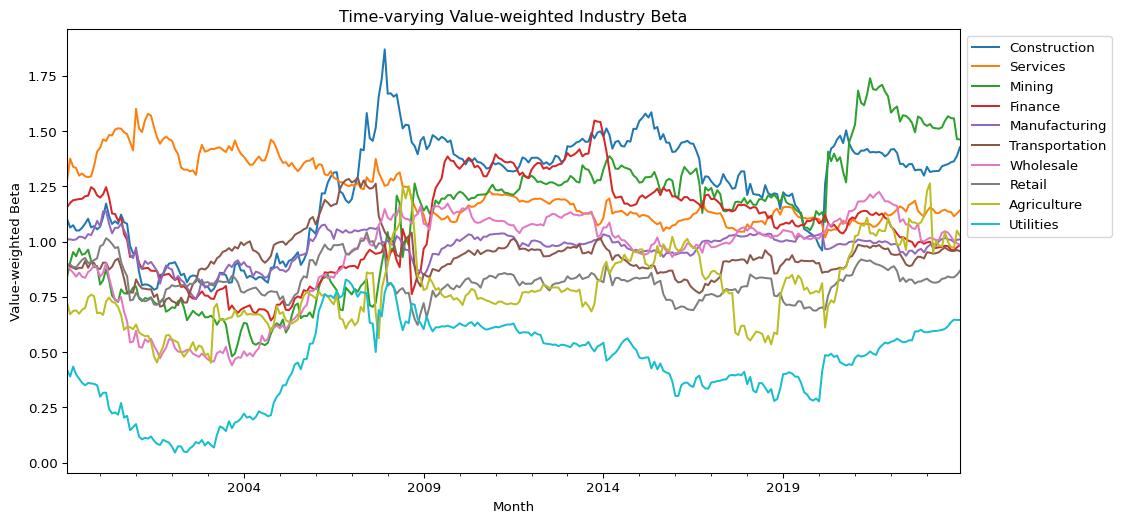

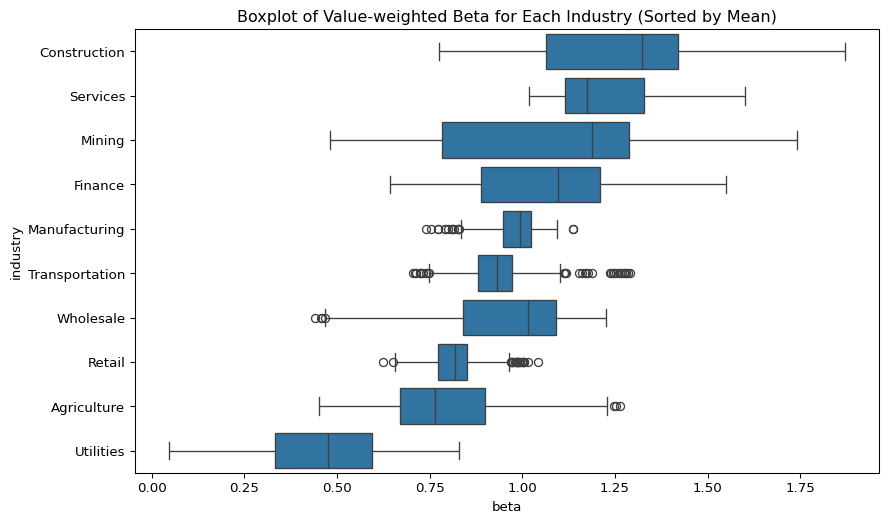

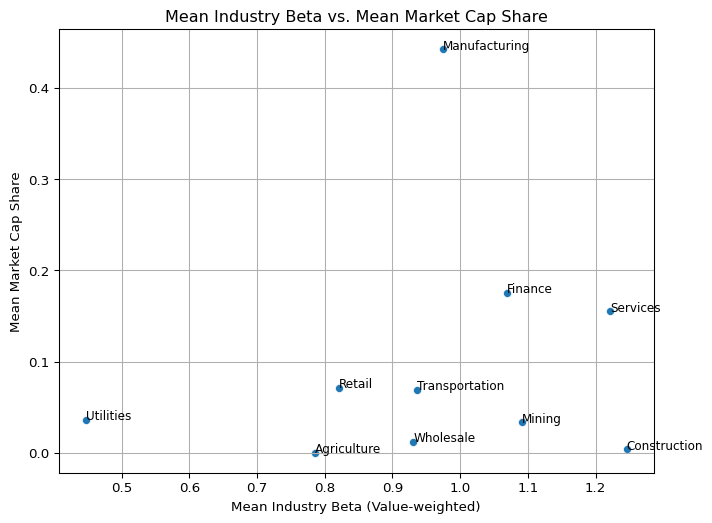

In [9]:
#@title Time-varying industry Market Betas

# ===============================================
# 1. Market Cap-weighted Industry Beta (Value-Weighted Beta)
# ===============================================
# CAPM의 factor loading인 beta는 산업 내 대형 기업일수록 시장과의 공분산에 더 큰 영향을 미치므로,
# 산업별 단순 평균 beta는 산업의 실제 systematic risk를 과소/과대평가할 수 있습니다.
# 따라서 각 기업의 시가총액으로 가중평균한 value-weighted beta를 계산합니다.

# Step 1: Beta weighted by market cap
df['beta_weighted'] = df['beta_monthly'] * df['mktcap']

# Step 2: Group by month and industry to compute weighted beta
pfo_beta_weighted = (
    df.groupby(['month', 'industry'])[['beta_weighted', 'mktcap']]
      .sum()
      .assign(beta_vw=lambda x: x['beta_weighted'] / x['mktcap'])
      .reset_index()
      .pivot(index='month', columns='industry', values='beta_vw')
)

# ===============================================
# 2. Time-Series Plot of Value-Weighted Industry Betas
# ===============================================
sorted_columns = pfo_beta_weighted.mean().sort_values(ascending=False).index

pfo_beta_weighted[sorted_columns].plot(
    kind='line',
    figsize=(12, 6),
    xlabel='Month',
    ylabel='Value-weighted Beta',
    title='Time-varying Value-weighted Industry Beta'
)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# ===============================================
# 3. Boxplot of Value-Weighted Industry Betas
# ===============================================
# Melt for seaborn
pfo_beta_weighted_melted = pd.melt(
    pfo_beta_weighted.reset_index(),
    id_vars=['month'],
    value_vars=pfo_beta_weighted.columns
)
pfo_beta_weighted_melted.columns = ['month', 'industry', 'beta']

# Sort industries by average beta
mean_beta_vw = pfo_beta_weighted_melted.groupby('industry')['beta'].mean().sort_values(ascending=False)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    y='industry',
    x='beta',
    data=pfo_beta_weighted_melted,
    order=mean_beta_vw.index,
    orient='h'
)
plt.title('Boxplot of Value-weighted Beta for Each Industry (Sorted by Mean)')
plt.show()

# ===============================================
# 4. Scatter Plot: Mean Beta vs. Mean Market Cap Share
# ===============================================
# Mean industry beta (value-weighted)
beta_mean = pfo_beta_weighted.mean()

# Mean market cap share (already normalized)
mktcap_share_mean = pfo_share.mean()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=beta_mean, y=mktcap_share_mean)
for industry in beta_mean.index:
    plt.text(beta_mean[industry], mktcap_share_mean[industry], industry, fontsize=9)
plt.xlabel('Mean Industry Beta (Value-weighted)')
plt.ylabel('Mean Market Cap Share')
plt.title('Mean Industry Beta vs. Mean Market Cap Share')
plt.grid(True)
plt.show()

In [10]:
#@title 10 Value-Weighted industry pfos

def weighted_avg(x, weights):
    """Calculates the weighted average of a series."""
    return np.average(x, weights=weights)

# Apply weighted_avg function to pivot_table
pfo_vw_ret_excess = df.pivot_table(
    index='month',
    columns='industry',
    values='ret_excess',
    aggfunc=lambda x: weighted_avg(x, df.loc[x.index, 'mktcap'])
)

pfo_vw_beta_lag = df.pivot_table(
    index='month',
    columns='industry',
    values='beta_lag',
    aggfunc=lambda x: weighted_avg(x, df.loc[x.index, 'mktcap'])
)

mean_vw_beta_lag = pfo_vw_beta_lag.mean().rename('mean_beta_lag')
mean_vw_ret_excess = pfo_vw_ret_excess.mean().rename('mean_ret_excess')

mkt_excess = factors_ff3_monthly['mkt_excess'].mean()
rf = factors_ff3_monthly['rf'].mean()

In [11]:
#@title Cross-sectional regressions for each month

# Fama-MacBeth (1973) two-pass procedure 

risk_premiums = (df
  .groupby("month")[['ret_excess', 'beta_lag']]
  .apply(lambda x: smf.ols(formula="ret_excess ~ beta_lag", data=x).fit().params)
  .reset_index()
)

# Time-series Aggregation (i.e. average)
# average across the time-series dimension to get the mean risk premium for each characteristic
# calculate t-test statistics for each regressor,
# critical values of 1.96 (at 5% significance) or 2.576 (at 1% significance) for two-tailed significance tests

mean_premiums = (risk_premiums
  .melt(id_vars="month", var_name="factor", value_name="estimate")
  .groupby("factor")["estimate"]
  .apply(lambda x: pd.Series({
      "mean_premium": 100*x.mean(),
      "t_statistic": x.mean()/x.std()*np.sqrt(len(x))
    })
  )
  .reset_index()
  .pivot(index="factor", columns="level_1", values="estimate")
  .reset_index()
)

# reporting standard errors of risk premiums, after adjusting for autocorrelation (Newey and West (1987) standard errors)

mean_premiums_newey_west = (risk_premiums
  .melt(id_vars="month", var_name="factor", value_name="estimate")
  .groupby("factor")
  .apply(lambda x: (
      x["estimate"].mean()/
        smf.ols("estimate ~ 1", x)
        .fit(cov_type="HAC", cov_kwds={"maxlags": 6}).bse
    ), include_groups=False
  )
  .reset_index()
  .rename(columns={"Intercept": "t_statistic_newey_west"})
)

fm_reg = (mean_premiums
  .merge(mean_premiums_newey_west, on="factor")
  .round(3)
)
fm_reg['mean_premium'] = fm_reg['mean_premium']*12

print('Annual Risk Premium of Market Beta')
fm_reg

Annual Risk Premium of Market Beta


factor  mean_premium  t_statistic  t_statistic_newey_west
0  Intercept         9.432        3.891                   3.046
1   beta_lag         1.860        0.766                   0.725

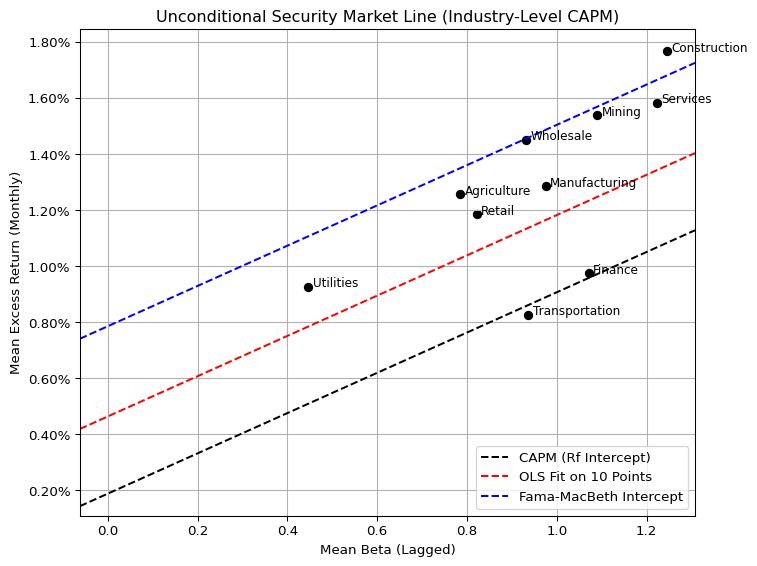

In [12]:
#@title CAPM SML prediction plot

import matplotlib.ticker as mtick

# Combine beta and return
pfo_sml = pd.concat([mean_vw_beta_lag, mean_vw_ret_excess], axis=1)
pfo_sml = pfo_sml.reset_index().rename(columns={'index': 'industry'})

# CAPM Regression Line (fitted to 10 points)
model = smf.ols('mean_ret_excess ~ mean_beta_lag', data=pfo_sml).fit()
intercept_capm_fit = model.params['Intercept']

# SML: CAPM predicted line (Rf intercept)
intercept_capm_theory = rf

# SML: Fama-MacBeth implied line (intercept from fm_reg table)
intercept_fm = fm_reg.loc[fm_reg['factor'] == 'Intercept', 'mean_premium'].values[0] / 100 / 12  # monthly rate

# Start plot
plt.figure(figsize=(8, 6))

# Scatter plot of 10 industries
for _, row in pfo_sml.iterrows():
    plt.scatter(row['mean_beta_lag'], row['mean_ret_excess'], color='black')
    plt.annotate(row['industry'], (row['mean_beta_lag'] + 0.01, row['mean_ret_excess']), fontsize=9)

# Draw SMLs
# Theoretical CAPM SML (Rf, slope = E[Rm - Rf])
plt.axline((0, intercept_capm_theory), slope=mkt_excess, linestyle='dashed', color='black', label='CAPM (Rf Intercept)')

# Regression fit line (OLS over 10 industry points)
plt.axline((0, intercept_capm_fit), slope=mkt_excess, linestyle='dashed', color='red', label='OLS Fit on 10 Points')

# Fama-MacBeth implied line (Intercept from FM regression)
plt.axline((0, intercept_fm), slope=mkt_excess, linestyle='dashed', color='blue', label='Fama-MacBeth Intercept')

# Format
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Mean Beta (Lagged)')
plt.ylabel('Mean Excess Return (Monthly)')
plt.title('Unconditional Security Market Line (Industry-Level CAPM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

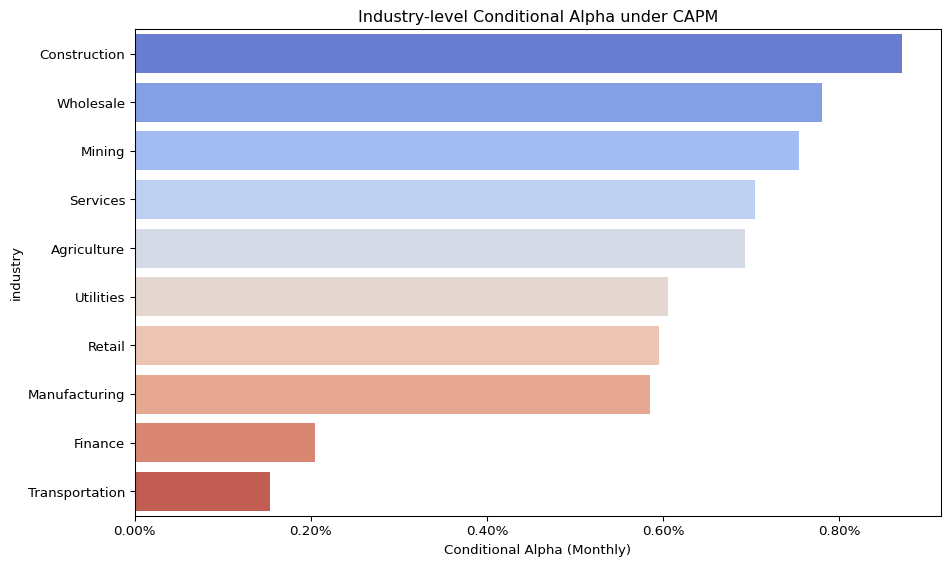

In [13]:
#@title 개별 산업의 mispricing 정도를 파악

# 1. Calculate conditional alpha
pfo_sml['capm_pred'] = pfo_sml['mean_beta_lag'] * mkt_excess
pfo_sml['alpha'] = pfo_sml['mean_ret_excess'] - pfo_sml['capm_pred']

# 2. Sort industries by alpha
pfo_sml_sorted = pfo_sml.sort_values(by='alpha', ascending=False)

# 3. Barplot of alpha
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=pfo_sml_sorted, x='alpha', y='industry', hue='industry', palette='coolwarm', dodge=False)
plt.axvline(0, color='black', linestyle='--')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Conditional Alpha (Monthly)')
plt.title('Industry-level Conditional Alpha under CAPM')
plt.tight_layout()
plt.show()